# 1. RandomCandyMachines - Problem Definition, Machines, and Gameplay

## I. Introduction

### I.1. About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (10/04/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Pandas
- Tqdm

### I.2. Multi-arm bandits and reinforcement learning problems 

Multi-arm bandit problems are very common reinforcement learning problems. According to R. Sutton [1], multi-arm bandit problems, can be described as follows.

*Consider the following learning problem. You are faced repeatedly with a choice among k different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or time steps.*

In simple layman terms, it consists of an **optimization** problem, where a player must take **actions**, on several successive **turns**, with the objective to maximize a **total outcome**, and the outcomes of each action might be **deterministic** (fixed for each action), or **stochastic** (decided randomly).

[1] Richard Sutton, Andrew Batrow - Reinforcement Learning, 2018.

### I.3. A multi-arm bandit problem example: random candy machines game

In this notebook and the Medium series, we consider the following toy example of a multi-arm bandit problem, a random candy machines game.

You are given $ N = 10000 $ coins and face $ M = 5 $ candy machines.

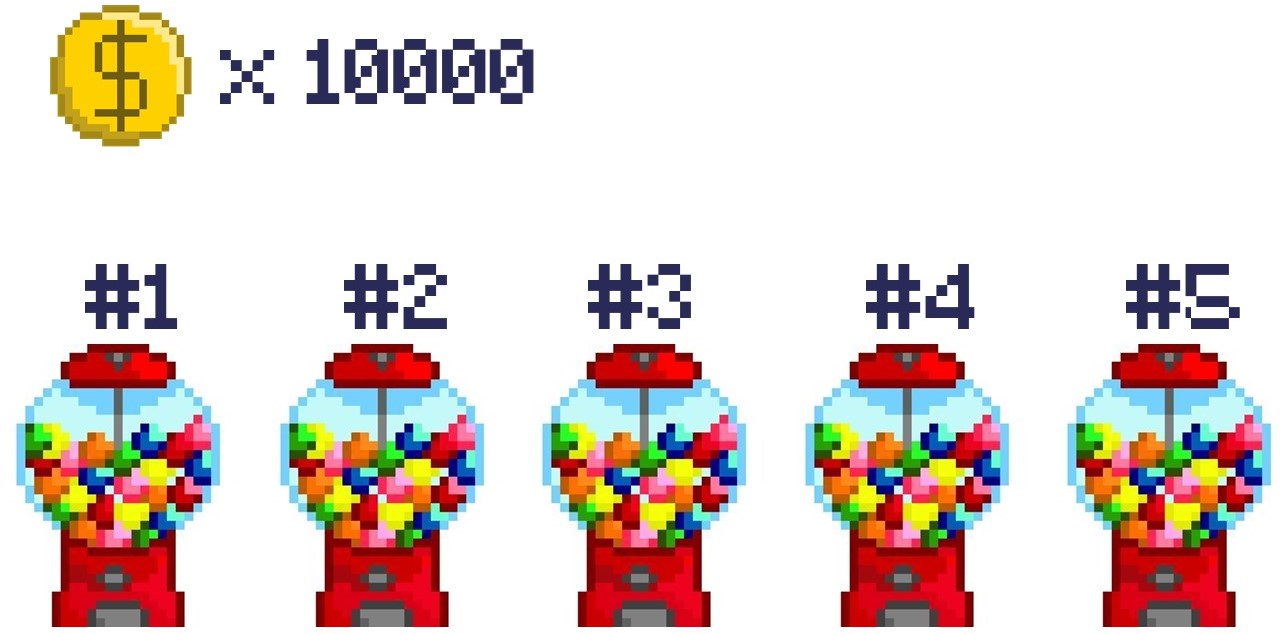

The first machine operates like a normal candy machine: whenever you put a coin in the machine, it gives you a single candy. The **outcome** of this **action** (putting the n-th coin in Machine #1) is **deterministic**, the outcome is constant and consists of a single candy.

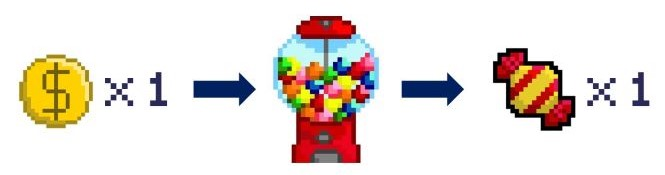

The other four machines (#2, #3, #4 and #5) are **random** candy machines: whenever you put a coin in one of these machines, it either gives you two candies, with a certain probability $ p $ or zero candies with probability $ (1-p) $. We assume these probabilities are **fixed** at the beginning of the game, and may differ for each of the machines, but as a player, you have no idea what the winning probabilities of each random candy machine might be. Because the probabilities of the outcomes on these random machines do not vary over time, the problem is called **stationnary**.

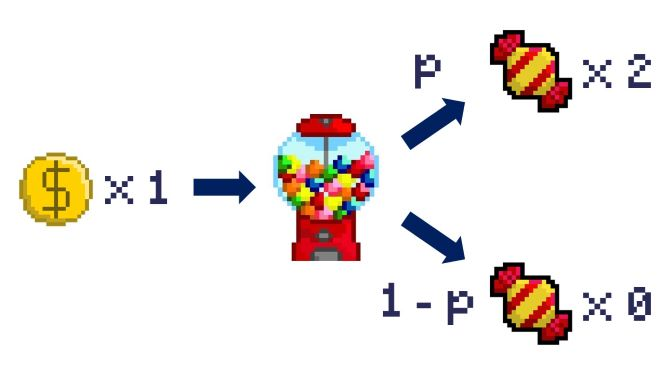

Your objective in this game is a very simple and intuitive task: come up with a strategy that will maximize the number of candies you can obtain!

### I.4. Imports and required libraries

This notebook and the RandomCandyMachines files rely on the following libraries:
- Matplotlib (for graphical display of performance graphs)
- Numpy (for array operations)
- Pandas (for displaying tables, listing the parameters of the game)
- Tqdm (for displaying waitbar and progression bars)

We will also import the custom functions and classes from, using the following imports.

In [1]:
from RandomCandyMachineGame import *

### I.5. Fixing seeds for reproducibility

For reproducibility, we will fix the random seeds of the numpy random variables, as shown below.

In [2]:
from numpy.random import seed as np_seed
random_seed = 81
np_seed(random_seed)

## II. Machines classes definition

In this first section, we focus on the custom object mimicking the deterministic and random machines, which will be used in our Random Candy machine game definition later on.

### II.1. Deterministic machines

The deterministic machines are simple, they cost $ N $ coins with $ N $ being the value assigned to the *cost* variable, by default, 1. This machine returns $ M $ candies when used, with $ M $ being the value assigned to the *return_price_if_win* variable, by default 1. We also assign an index to the machine, which is stored in the *machine_number* variable.

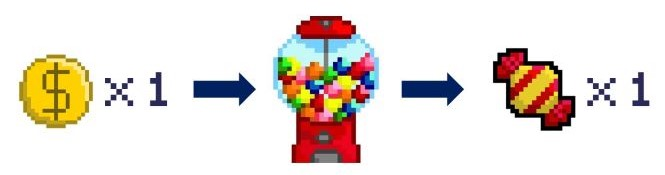

In [3]:
# Initialize a DeterministicCandyMachine
dcm = DeterministicCandyMachine(machine_number = 1, \
                                cost = 1, \
                                return_price_if_win = 1)
dcm.describe()

{'machine_number': 1, 'machine_type': 'deterministic', 'cost': 1, 'return_price_if_win': 1, 'return_price_if_loss': 1, 'probability_win': 1}


Later on, we will use the *put_one_coin()* method, which mimics the operation of putting a coin in the machine and returns the number of candies obtained with this operation. Because the machine is deterministic, it always returns *return_price_if_win* candies, as shown below.

In [4]:
# Put one coin in the machine
number_of_candies = dcm.put_one_coin()
print("Put one coin, and received the following number of candies: ", number_of_candies)

Put one coin, and received the following number of candies:  1


We can then play the machine 1000 times, by using a for loop. We will obtain, as is expected, 1000 candies.

In [5]:
# Put all 10000 coins in the machine
coins_number = 10000
total_number_of_candies = dcm.put_n_coins(coins_number)
print("Empirical reward for {} coins: ".format(coins_number), total_number_of_candies)
expected_number_candies = dcm.expected_reward(coins_number)
print("Theoretical reward for {} coins: ".format(coins_number), expected_number_candies)

Empirical reward for 10000 coins:  10000
Theoretical reward for 10000 coins:  10000.0


### II.2. Random machines

The random machines are similar to the deterministic ones, in the sense that they are assigned an index, which is stored in the *machine_number* variable, and that their cost is fixed to $ N $ coins (with $ N $ being the value assigned to the *cost* variable, by default, 1).

They however return $ M_1 $ candies with a probability of $ p $ and $ M_2 $ candies with probability $ 1 - p $, with:
- $ M_1 $ being the value assigned to the *return_price_if_win* variable, by default 2,
- $ M_2 $ being the value assigned to the *return_price_if_loss* variable, by default 0,
- and $ p $ the winning probability, stored in *probability_win*.

If *None* is passed as the assigned value of *probability_win*, a random value for the winning probability *p* is defined, following an uniform random variable with values in $[0, 1]$.

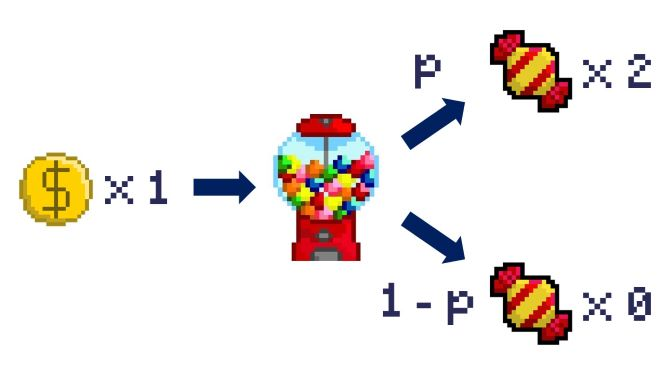

In [6]:
# Initialize a RandomCandyMachine
rcm = RandomCandyMachine(machine_number = 2, \
                         cost = 1, \
                         return_price_if_win = 2, \
                         return_price_if_loss = 0, \
                         probability_win = None)
rcm.describe()

{'machine_number': 2, 'machine_type': 'random', 'cost': 1, 'return_price_if_win': 2, 'return_price_if_loss': 0, 'probability_win': 0.3554191178052365}


As before, we will use the *put_one_coin()* method, which mimics the operation of putting a coin in the machine and returns the number of candies obtained with this operation. Because the macine is random, it either returns *return_price_if_win* or *return_price_if_loss* candies, as shown below.

In [7]:
# Put one coin in the machine
number_of_candies = rcm.put_one_coin()
print("Put one coin, and received the following number of candies: ", number_of_candies)
number_of_candies = rcm.put_one_coin()
print("Put a second coin, and received the following number of candies: ", number_of_candies)
number_of_candies = rcm.put_one_coin()
print("Put one more coin, and received the following number of candies: ", number_of_candies)
number_of_candies = rcm.put_one_coin()
print("Put one last coin, and received the following number of candies: ", number_of_candies)

Put one coin, and received the following number of candies:  2
Put a second coin, and received the following number of candies:  0
Put one more coin, and received the following number of candies:  0
Put one last coin, and received the following number of candies:  0


We can also play 1000 coins in quick succession, using a for loop as before. We can also use the *expected_reward()* method to compute the theoretical expectation for our machine given any number of coins used. As expected our expected reward is then simply given as 

$ M_1 p + M_2 (1-p) = return\_price\_if\_win \times probability\_win + (1 - probability\_win) \times return\_price\_if\_loss $

In [8]:
# Put all 10000 coins in the machine
coins_number = 10000
total_number_of_candies = rcm.put_n_coins(coins_number)
print("Empirical reward for {} coins: ".format(coins_number), total_number_of_candies)
expected_number_candies = rcm.expected_reward()
print("Winning probability of machine: ", rcm.probability_win)
print("Theoretical reward for 1 coin:", expected_number_candies)
expected_number_candies = rcm.expected_reward(coins_number)
print("Theoretical reward for {} coins: ".format(coins_number), expected_number_candies)

Empirical reward for 10000 coins:  7104
Winning probability of machine:  0.3554191178052365
Theoretical reward for 1 coin: 0.710838235610473
Theoretical reward for 10000 coins:  7108.38235610473


### II.3. Candy Machines Game definition (waiting user actions)

To initialize a game, we will use the CandyMachineGame, as shown below.
It receives a few parameters, namely:
- *machines_cost*: an integer, denoting the cost, in terms of numbers of coins, for each use of the machines,
- *playable_money*: an integer, denoting the total amount of coins avaiable to the player, which we will fix to 10, for demonstration purposes,
- *number_of_deterministic_machines*: an integer, corresponding to the number of deterministic machines in the game,
- *number_of_random_machines*: an integer, corresponding to the number of random machines in the game,
- *random_parameters*: list of float values between [0,1], of length *number_of_random_machines*, corresponding to the winning probabilities to be used for each random machine. If None is passed instead, the *winning_probability* values for the random machines will be randomly drawn from a uniform [0,1] random variable.
- *agent_type*: the type of agent, which will play the game. For demonstration purposes, we set it to the *'user'* string for now, meaning the player will have to decide manually on which machines to play. Later on, different types of agents will be considered.
- *random_seed*: a seed value, for reproducibility. For simplicity, we reuse the seed we fixed at the beginning of this notebook.

The describe() method, returns a dictionnary containing the attributes of our CandyMachineGame object, which contains the following attributes:

- *agent_random_seed*: a fixed random seed for the given agent, in case the agent relies on random variables. Here, the agent is following the user decisions, and has therefore no need to rely on random variables.
- *random_seed*: As defined earlier.
- *playable_money*: The amount of money, that remains to be played. For now it is set to the value passed as *playable_money* to the CandyMachineGame object.
- *initial_money*: The initial amount of money, to be used by the player, as defined earlier.
- *machines_cost*: As defined earlier.
- *number_of_deterministic_machines*: As defined earlier.
- *number_of_random_machines*: As defined earlier.
- *total_number_of_machines*: Simply defined as the sum of *number_of_deterministic_machines* and *number_of_random_machines*
- *random_parameters*: As defined earlier.
- *return_prices_for_deterministic_machines*: As defined earlier.
- *return_prices_for_random_machines_win*: As defined earlier.
- *return_prices_for_random_machines_loss*: As defined earlier.
- *list_of_machines*: a list of DeterministicCandyMachine and RandomCandyMachine, with parameters matching the ones specified.
- *agent_type*: As defined earlier.
- *agent_parameters*: In the agent relies on a few parameters (for instance the $ \epsilon $ value for an $ \epsilon $-greedy strategy). For now, it is set to None, but it will vary later on, when we investigate additional agent types. 
- *agent*: An Agent custom object containing the agent of type agent_type.
- *display_bool*: A boolean deciding on whether or not a display bar needs to be provided to keep track of the advancement of the game. For now it is set to True, but it has no impact, since the agent_type was set to 'user'.

In [9]:
# Initialize a CandyMachineGame, with UserAgent
cmg = CandyMachineGame(machines_cost = 1, \
                       playable_money = 10, \
                       number_of_deterministic_machines = 1, \
                       number_of_random_machines = 4, \
                       random_parameters = None, \
                       agent_type = 'user', \
                       random_seed = random_seed)
cmg.describe()

{'agent_random_seed': None, 'random_seed': 81, 'playable_money': 10, 'initial_money': 10, 'machines_cost': 1, 'number_of_deterministic_machines': 1, 'number_of_random_machines': 4, 'total_number_of_machines': 5, 'random_parameters': [0.3554191178052365, 0.34084887668930164, 0.9331064422815699, 0.9138191856450265], 'return_prices_for_deterministic_machines': 1, 'return_prices_for_random_machines_win': 2, 'return_prices_for_random_machines_loss': 0, 'list_of_machines': [<CandyMachines.DeterministicCandyMachine object at 0x0000024D1471FE50>, <CandyMachines.RandomCandyMachine object at 0x0000024D1471F970>, <CandyMachines.RandomCandyMachine object at 0x0000024D1471F670>, <CandyMachines.RandomCandyMachine object at 0x0000024D1471F430>, <CandyMachines.RandomCandyMachine object at 0x0000024D1471F580>], 'display_bool': False, 'agent_type': 'user', 'agent_parameters': None, 'agent': <CandyAgents.UserAgent object at 0x0000024D1471FEB0>}


We provide a first method *display_machines_list()*, which lists in a table, the different machines created for this instance of the game, along with their key parameters.

In [10]:
# Display a pandas DataFrame with all the machines info
cmg.display_machines_list()

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.355419   
2              3         random    1          2           0        0.340849   
3              4         random    1          2           0        0.933106   
4              5         random    1          2           0        0.913819   

   Expected_return  
0         1.000000  
1         0.710838  
2         0.681698  
3         1.866213  
4         1.827638  


When the agent type is set to 'user', the user mst specify which machines he or she wants to play on, manually. This can be done using the *play_on_machine()* method whose only expected argument is the *machine_number* on which a coin must be played. 

In [11]:
# Play on machine 1
cmg.play_on_machine(machine_number = 1)
# Play on machine 1 again
cmg.play_on_machine(machine_number = 1)
# Play on machine 2
cmg.play_on_machine(machine_number = 2)
# Play on machine 4
cmg.play_on_machine(machine_number = 4)

By playing on machines, the game automatically updates the game history attribute, as shown below. For convenience, we also provide a *display_history()* method, which displays the history in a convenient table. It lists the machine number played on each turn, the cost of the machine, an the outcome (i.e. the number of candies obtained on this turn) for each machine. additional parameters (namely Exploration_play and regret) are also listed, but we will discuss these parameters later on, once we investigate additional strategies.

In [12]:
print(cmg.agent.history)

{'Machine_number': [1, 1, 2, 4], 'Exploration_play': [None, None, None, None], 'Cost': [1, 1, 1, 1], 'Outcome': [1, 1, 0, 2], 'Regret': [0.8662128845631398, 0.8662128845631398, 1.8662128845631398, -0.13378711543686017]}


In [13]:
cmg.agent.display_history()

   Machine_number Exploration_play  Cost  Outcome    Regret
0               1             None     1        1  0.866213
1               1             None     1        1  0.866213
2               2             None     1        0  1.866213
3               4             None     1        2 -0.133787


For convenience, we also provide a *play()* method, which keeps on asking for user's inputs on which machines to play until all coins have been used. Feel free to play, and see for yourself how the history gets updated with your decisions!

In [14]:
cmg.play()

-----


KeyboardInterrupt: Interrupted by user

In [ ]:
cmg.agent.display_history()

After you are done playing, you can use the *compute_agent_outcome()* method to reveal the number of candies you have obtained!

In [ ]:
print("You obtained a total of {} candies!".format(cmg.compute_agent_outcome()))

Feel free to play around with the game framework, and try to obtain the highest possible score!

## III. End of file and what is next

In this notebook, we have introduced the key elements of our RandomCandyMachine game, and some key aspects about the game.

We have also defined a first agent-type, which relies on user-given decisions.

In the next notebook, we will investigate our first reference strategies: the best-deterministic, prior-knowledge and random strategies! 